## CNN model
### Learning from scratch (without data augmentation)

In [7]:
#initializing the model. Architecture similar to VGG16. Image input size 256x256x3

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(256,256,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [8]:
#importing the dataset. creating train and validation generators
#Dataset contains 5000 images. The train/val/test split is 60/20/20.

from keras.preprocessing.image import ImageDataGenerator

train_dir = "/Users/ajdinburnic/Desktop/Master Thesis/Dataset/train"
validation_dir = "/Users/ajdinburnic/Desktop/Master Thesis/Dataset/validation"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=30,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(256,256),
    batch_size=30,
    class_mode='binary')


Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
#model compilation

from tensorflow.keras.optimizers.legacy import RMSprop #legacy vazno!!!

model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(learning_rate = 1e-4),
             metrics=['acc'])

In [5]:
#training

model_training = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs = 30,
                             validation_data=validation_generator,
                             validation_steps = 33)

/var/folders/gk/q830q7055zlc82yd9s8sh7jh0000gn/T/ipykernel_62083/2559606865.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/30


2023-02-15 12:53:13.872177: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-15 12:53:14.412052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.3957 - acc: 0.8210

2023-02-15 12:53:42.998962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 36s 338ms/step - loss: 0.3957 - acc: 0.8210 - val_loss: 0.2400 - val_acc: 0.9010
Epoch 2/30
100/100 [==============================] - 32s 319ms/step - loss: 0.2281 - acc: 0.9113 - val_loss: 0.1747 - val_acc: 0.9323
Epoch 3/30
100/100 [==============================] - 34s 343ms/step - loss: 0.1979 - acc: 0.9190 - val_loss: 0.2176 - val_acc: 0.9131
Epoch 4/30
100/100 [==============================] - 36s 355ms/step - loss: 0.1683 - acc: 0.9340 - val_loss: 0.1802 - val_acc: 0.9212
Epoch 5/30
100/100 [==============================] - 37s 366ms/step - loss: 0.1538 - acc: 0.9437 - val_loss: 0.1702 - val_acc: 0.9404
Epoch 6/30
100/100 [==============================] - 39s 386ms/step - loss: 0.1398 - acc: 0.9463 - val_loss: 0.1351 - val_acc: 0.9424
Epoch 7/30
100/100 [==============================] - 40s 402ms/step - loss: 0.1340 - acc: 0.9507 - val_loss: 0.1345 - val_acc: 0.9455
Epoch 8/30
100/100 [==============================] - 40s 398ms/st

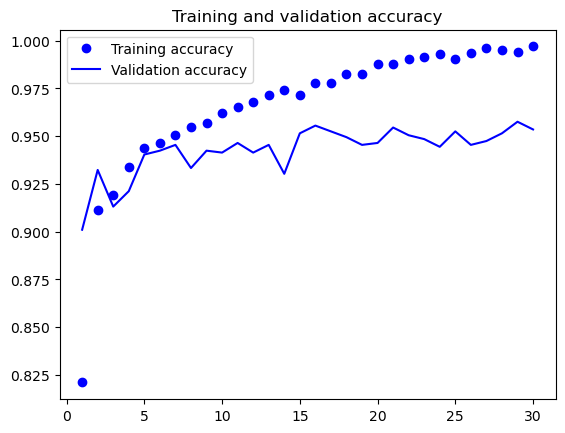

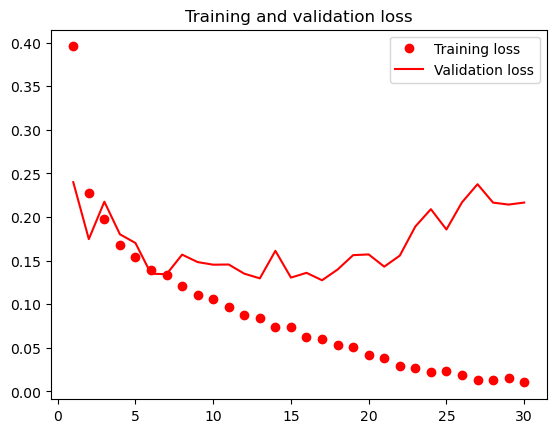

In [12]:
import matplotlib.pyplot as plt

acc = model_training.history['acc']
val_acc = model_training.history['val_acc']
loss = model_training.history['loss']
val_loss = model_training.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()